是否還有 NaN 值: 0
Column names: Index(['Category', 'Description'], dtype='object')
data.head =      Category                                        Description
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...


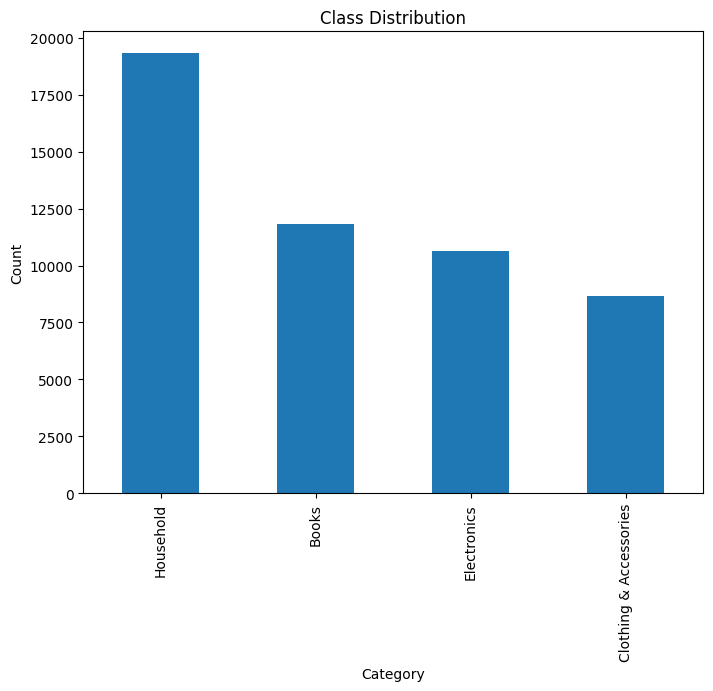

Training set size: 35296
Validation set size: 5042
Test set size: 10086


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.svm import LinearSVC
import time
# 假設數據集包含兩個欄位：類別和描述
column_names = ['Category', 'Description']

# 載入數據集並指定欄位名稱
file_path = './ecommerceDataset.csv'
ecommerce_data = pd.read_csv(file_path, names=column_names, header=None)
# 清除 NaN 值
ecommerce_data.dropna(subset=['Category', 'Description'], inplace=True)

# 檢查是否還有任何 NaN 值
print("是否還有 NaN 值:", ecommerce_data.isnull().sum().sum())
# 檢查數據的前幾行以確認欄位名稱是否正確
print("Column names:", ecommerce_data.columns)
print("data.head = ", ecommerce_data.head())

# 檢查類別分佈
category_counts = ecommerce_data['Category'].value_counts()

# 繪製類別分佈圖
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 資料切分：70%訓練，10%驗證，20%測試
train_data, temp_data = train_test_split(ecommerce_data, test_size=0.3, stratify=ecommerce_data['Category'], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=2/3, stratify=temp_data['Category'], random_state=42)

print("Training set size:", train_data.shape[0])
print("Validation set size:", val_data.shape[0])
print("Test set size:", test_data.shape[0])


In [2]:
# 分割數據集
train_data, temp_data = train_test_split(ecommerce_data, test_size=0.3, stratify=ecommerce_data['Category'], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=2/3, stratify=temp_data['Category'], random_state=42)

X_train, y_train = train_data['Description'], train_data['Category']
X_test, y_test = test_data['Description'], test_data['Category']

In [3]:
# 定義特徵工程器
bow_vectorizer = CountVectorizer()  # Bag of Words
tfidf_vectorizer = TfidfVectorizer()  # TF-IDF
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))  # 使用1-gram和2-gram
print("ngram_vectorizer = " , ngram_vectorizer)

ngram_vectorizer =  CountVectorizer(ngram_range=(1, 2))


In [4]:
# 生成特徵
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_train_ngram = ngram_vectorizer.fit_transform(X_train)

X_test_bow = bow_vectorizer.transform(X_test)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_test_ngram = ngram_vectorizer.transform(X_test)
print(" X_train_ngram = " ,X_train_ngram)
print(" X_test_ngram" , X_test_ngram)

 X_train_ngram =    (0, 238793)	6
  (0, 316105)	6
  (0, 760577)	3
  (0, 320823)	1
  (0, 739176)	20
  (0, 400091)	1
  (0, 304015)	1
  (0, 590023)	1
  (0, 309650)	1
  (0, 220535)	5
  (0, 143205)	6
  (0, 67252)	9
  (0, 510413)	3
  (0, 471213)	1
  (0, 522384)	10
  (0, 683113)	1
  (0, 760683)	1
  (0, 565348)	3
  (0, 408794)	5
  (0, 121055)	3
  (0, 495067)	4
  (0, 618886)	1
  (0, 732363)	1
  (0, 765423)	6
  (0, 617129)	1
  :	:
  (35295, 388480)	1
  (35295, 559561)	1
  (35295, 317803)	1
  (35295, 731422)	1
  (35295, 192482)	1
  (35295, 452335)	1
  (35295, 748322)	1
  (35295, 690577)	1
  (35295, 792776)	1
  (35295, 65349)	1
  (35295, 52891)	1
  (35295, 387269)	1
  (35295, 319228)	1
  (35295, 482661)	1
  (35295, 356280)	1
  (35295, 453180)	1
  (35295, 387263)	1
  (35295, 317782)	1
  (35295, 309874)	1
  (35295, 60555)	1
  (35295, 848318)	1
  (35295, 365143)	1
  (35295, 319242)	1
  (35295, 378985)	1
  (35295, 365436)	1
 X_test_ngram   (0, 56581)	1
  (0, 56633)	1
  (0, 57779)	1
  (0, 57791)	1
  (0

In [6]:

# 定義模型
models = {
    'Logistic Regression (BoW)': LogisticRegression(),
    'Logistic Regression (TF-IDF)': LogisticRegression(),
    'Logistic Regression (N-gram)': LogisticRegression(),
    'Decision Tree (BoW)': DecisionTreeClassifier(),
    'Decision Tree (TF-IDF)': DecisionTreeClassifier(),
    'Decision Tree (N-gram)': DecisionTreeClassifier(),
    'SVM (BoW)': LinearSVC(),
    'SVM (TF-IDF)': LinearSVC(),
    'SVM (N-gram)': LinearSVC()
}

In [7]:

# 訓練和測試特徵集
feature_sets = {
    'BoW': (X_train_bow, X_test_bow),
    'TF-IDF': (X_train_tfidf, X_test_tfidf),
    'N-gram': (X_train_ngram, X_test_ngram)
}

# 定義一個函數來測量訓練和推理時間
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    # 訓練時間
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    train_time = end_train - start_train

    # 推理時間
    start_inference = time.time()
    y_pred = model.predict(X_test)
    end_inference = time.time()
    inference_time = end_inference - start_inference

    # 模型評估
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print(f"{name} - Accuracy: {accuracy:.4f}, Macro F1 Score: {f1:.4f}")
    print("Confusion Matrix:\n", cm)
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Inference Time: {inference_time:.4f} seconds")
    print("--------------------------------------------------")
    
    return {
        'Model': name,
        'Accuracy': accuracy,
        'Macro F1 Score': f1,
        'Training Time (s)': train_time,
        'Inference Time (s)': inference_time
    }



In [10]:
import time
# 收集結果
results = []

# 執行每個模型並記錄結果
for name, model in models.items():
    feature_type = name.split(' ')[-1].strip('()')
    X_train_features, X_test_features = feature_sets[feature_type]
    result = evaluate_model(name, model, X_train_features, y_train, X_test_features, y_test)
    results.append(result)

# 轉換結果為 DataFrame 以便比較
results_df = pd.DataFrame(results)
print(results_df)

C:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (BoW) - Accuracy: 0.9740, Macro F1 Score: 0.9742
Confusion Matrix:
 [[2305   10   12   37]
 [   9 1698    8   19]
 [  28    3 2036   58]
 [  36   14   28 3785]]
Training Time: 17.2214 seconds
Inference Time: 0.0125 seconds
--------------------------------------------------


C:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (TF-IDF) - Accuracy: 0.9676, Macro F1 Score: 0.9678
Confusion Matrix:
 [[2265   16   15   68]
 [   7 1695    7   25]
 [  35    3 2006   81]
 [  23   18   29 3793]]
Training Time: 17.5536 seconds
Inference Time: 0.0110 seconds
--------------------------------------------------


C:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (N-gram) - Accuracy: 0.9750, Macro F1 Score: 0.9752
Confusion Matrix:
 [[2306    9    9   40]
 [  11 1698    6   19]
 [  29    3 2042   51]
 [  34   15   26 3788]]
Training Time: 138.1704 seconds
Inference Time: 0.0571 seconds
--------------------------------------------------
Decision Tree (BoW) - Accuracy: 0.9545, Macro F1 Score: 0.9553
Confusion Matrix:
 [[2259   13   20   72]
 [  14 1657   12   51]
 [  20    3 1995  107]
 [  44   35   68 3716]]
Training Time: 34.8538 seconds
Inference Time: 0.0163 seconds
--------------------------------------------------
Decision Tree (TF-IDF) - Accuracy: 0.9477, Macro F1 Score: 0.9482
Confusion Matrix:
 [[2260   15   20   69]
 [  12 1649   12   61]
 [  27   14 1959  125]
 [  50   44   78 3691]]
Training Time: 42.8416 seconds
Inference Time: 0.0423 seconds
--------------------------------------------------
Decision Tree (N-gram) - Accuracy: 0.9535, Macro F1 Score: 0.9544
Confusion Matrix:
 [[2257   14   20   73]
 [  14 1661    

C:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM (BoW) - Accuracy: 0.9734, Macro F1 Score: 0.9735
Confusion Matrix:
 [[2308    9   14   33]
 [   9 1697    8   20]
 [  26    5 2036   58]
 [  34   13   39 3777]]
Training Time: 13.6346 seconds
Inference Time: 0.0145 seconds
--------------------------------------------------
SVM (TF-IDF) - Accuracy: 0.9783, Macro F1 Score: 0.9786
Confusion Matrix:
 [[2296   11   13   44]
 [   3 1709    6   16]
 [  15    3 2053   54]
 [  17   11   26 3809]]
Training Time: 2.2154 seconds
Inference Time: 0.0145 seconds
--------------------------------------------------


C:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM (N-gram) - Accuracy: 0.9751, Macro F1 Score: 0.9750
Confusion Matrix:
 [[2308   11   10   35]
 [  14 1699    7   14]
 [  32    4 2041   48]
 [  35   13   28 3787]]
Training Time: 36.6812 seconds
Inference Time: 0.0434 seconds
--------------------------------------------------
                          Model  Accuracy  Macro F1 Score  Training Time (s)  \
0     Logistic Regression (BoW)  0.974023        0.974166          17.221358   
1  Logistic Regression (TF-IDF)  0.967579        0.967830          17.553559   
2  Logistic Regression (N-gram)  0.975015        0.975164         138.170433   
3           Decision Tree (BoW)  0.954491        0.955276          34.853784   
4        Decision Tree (TF-IDF)  0.947749        0.948211          42.841609   
5        Decision Tree (N-gram)  0.953500        0.954393         152.717438   
6                     SVM (BoW)  0.973429        0.973546          13.634569   
7                  SVM (TF-IDF)  0.978287        0.978590           2.215381   

In [11]:
# 將結果儲存為文本檔案
filename = 'HW2_Part_A_Ans.txt'
with open(filename, 'w') as f:
    f.write(results_df.to_string())
print(f"Results saved to {filename}")


Results saved to HW2_Part_A_Ans.txt


In [5]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# 定義單獨的目標函數，針對特定分類器進行優化
def objective_logistic_regression(trial):
    # Logistic Regression 超參數
    C = trial.suggest_loguniform("C", 1e-4, 1e2)
    solver = trial.suggest_categorical("solver", ["liblinear", "lbfgs"])
    model = LogisticRegression(C=C, solver=solver, max_iter=2000)

    # 訓練模型
    model.fit(X_train_tfidf, y_train)
    # 預測並評估準確率
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

def objective_decision_tree(trial):
    # Decision Tree 超參數
    max_depth = trial.suggest_int("max_depth", 2, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)

    # 訓練模型
    model.fit(X_train_tfidf, y_train)
    # 預測並評估準確率
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

def objective_linear_svc(trial):
    # LinearSVC 超參數
    C = trial.suggest_loguniform("C", 1e-4, 1e2)
    max_iter = trial.suggest_int("max_iter", 1000, 10000)
    model = LinearSVC(C=C, max_iter=max_iter)

    # 訓練模型
    model.fit(X_train_tfidf, y_train)
    # 預測並評估準確率
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# 分別為每個分類器創建一個 study
study_logistic = optuna.create_study(direction="maximize")
study_logistic.optimize(objective_logistic_regression, n_trials=50)

study_decision_tree = optuna.create_study(direction="maximize")
study_decision_tree.optimize(objective_decision_tree, n_trials=50)

study_linear_svc = optuna.create_study(direction="maximize")
study_linear_svc.optimize(objective_linear_svc, n_trials=50)

# 顯示每個分類器的最佳結果
print("Best trial for Logistic Regression:")
print("  Value: ", study_logistic.best_trial.value)
print("  Params: ")
for key, value in study_logistic.best_trial.params.items():
    print(f"    {key}: {value}")

print("\nBest trial for Decision Tree:")
print("  Value: ", study_decision_tree.best_trial.value)
print("  Params: ")
for key, value in study_decision_tree.best_trial.params.items():
    print(f"    {key}: {value}")

print("\nBest trial for LinearSVC:")
print("  Value: ", study_linear_svc.best_trial.value)
print("  Params: ")
for key, value in study_linear_svc.best_trial.params.items():
    print(f"    {key}: {value}")

# 找出最優模型
best_model_name = None
best_model_params = None
best_model_accuracy = 0

if study_logistic.best_trial.value > best_model_accuracy:
    best_model_name = "Logistic Regression"
    best_model_params = study_logistic.best_trial.params
    best_model_accuracy = study_logistic.best_trial.value

if study_decision_tree.best_trial.value > best_model_accuracy:
    best_model_name = "Decision Tree"
    best_model_params = study_decision_tree.best_trial.params
    best_model_accuracy = study_decision_tree.best_trial.value

if study_linear_svc.best_trial.value > best_model_accuracy:
    best_model_name = "LinearSVC"
    best_model_params = study_linear_svc.best_trial.params
    best_model_accuracy = study_linear_svc.best_trial.value

# 顯示最好的模型
print("\nBest overall model:")
print("  Model: ", best_model_name)
print("  Accuracy: ", best_model_accuracy)
print("  Params: ")
for key, value in best_model_params.items():
    print(f"    {key}: {value}")


C:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-11-07 18:44:51,504] A new study created in memory with name: no-name-4fd4ddd8-dc83-44c7-95b0-d2e7cd2ac461
C:\Users\USER\AppData\Local\Temp\ipykernel_35424\3944157416.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-4, 1e2)
[I 2024-11-07 18:44:52,135] Trial 0 finished with value: 0.3830061471346421 and parameters: {'C': 0.0008986893729752881, 'solver': 'liblinear'}. Best is trial 0 with value: 0.3830061471346421.
C:\Users\USER\AppData\Local\Temp\ipykernel_35424\3944157416.py:10: FutureWarning: suggest_loguniform has been depr

Best trial for Logistic Regression:
  Value:  0.9804679754114615
  Params: 
    C: 95.79830565462413
    solver: liblinear

Best trial for Decision Tree:
  Value:  0.8943089430894309
  Params: 
    max_depth: 32
    min_samples_split: 4

Best trial for LinearSVC:
  Value:  0.9798730914138409
  Params: 
    C: 7.20637823710099
    max_iter: 1783

Best overall model:
  Model:  Logistic Regression
  Accuracy:  0.9804679754114615
  Params: 
    C: 95.79830565462413
    solver: liblinear


In [8]:
# 使用最佳超參數定義模型
models = {
    'Logistic Regression (BoW)': LogisticRegression(C=53.99766408775696, solver='lbfgs', max_iter=2000),
    'Logistic Regression (TF-IDF)': LogisticRegression(C=53.99766408775696, solver='lbfgs', max_iter=2000),
    'Logistic Regression (N-gram)': LogisticRegression(C=53.99766408775696, solver='lbfgs', max_iter=2000),
    'Decision Tree (BoW)': DecisionTreeClassifier(max_depth=32, min_samples_split=6),
    'Decision Tree (TF-IDF)': DecisionTreeClassifier(max_depth=32, min_samples_split=6),
    'Decision Tree (N-gram)': DecisionTreeClassifier(max_depth=32, min_samples_split=6),
    'LinearSVC (BoW)': LinearSVC(C=6.833211804184336, max_iter=7783),
    'LinearSVC (TF-IDF)': LinearSVC(C=6.833211804184336, max_iter=7783),
    'LinearSVC (N-gram)': LinearSVC(C=6.833211804184336, max_iter=7783)
}

# 訓練和測試特徵集
feature_sets = {
    'BoW': (X_train_bow, X_test_bow),
    'TF-IDF': (X_train_tfidf, X_test_tfidf),
    'N-gram': (X_train_ngram, X_test_ngram)
}

# 定義一個函數來測量訓練和推理時間
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    # 訓練時間
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    train_time = end_train - start_train

    # 推理時間
    start_inference = time.time()
    y_pred = model.predict(X_test)
    end_inference = time.time()
    inference_time = end_inference - start_inference

    # 模型評估
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print(f"{name} - Accuracy: {accuracy:.4f}, Macro F1 Score: {f1:.4f}")
    print("Confusion Matrix:\n", cm)
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Inference Time: {inference_time:.4f} seconds")
    print("--------------------------------------------------")
    
    return {
        'Model': name,
        'Accuracy': accuracy,
        'Macro F1 Score': f1,
        'Training Time (s)': train_time,
        'Inference Time (s)': inference_time
    }

# 收集結果
results = []

# 執行每個模型並記錄結果
for name, model in models.items():
    feature_type = name.split(' ')[-1].strip('()')
    X_train_features, X_test_features = feature_sets[feature_type]
    result = evaluate_model(name, model, X_train_features, y_train, X_test_features, y_test)
    results.append(result)

# 轉換結果為 DataFrame 以便比較
results_df = pd.DataFrame(results)
print(results_df)

Logistic Regression (BoW) - Accuracy: 0.9727, Macro F1 Score: 0.9730
Confusion Matrix:
 [[2305    9   13   37]
 [   8 1697    6   23]
 [  30    5 2032   58]
 [  42   12   32 3777]]
Training Time: 124.0139 seconds
Inference Time: 0.0151 seconds
--------------------------------------------------
Logistic Regression (TF-IDF) - Accuracy: 0.9804, Macro F1 Score: 0.9807
Confusion Matrix:
 [[2313    8    8   35]
 [   4 1709    6   15]
 [  13    3 2055   54]
 [  16   10   26 3811]]
Training Time: 59.8273 seconds
Inference Time: 0.0120 seconds
--------------------------------------------------
Logistic Regression (N-gram) - Accuracy: 0.9753, Macro F1 Score: 0.9754
Confusion Matrix:
 [[2308   10    9   37]
 [  12 1700    7   15]
 [  29    4 2042   50]
 [  37   12   27 3787]]
Training Time: 555.2557 seconds
Inference Time: 0.0610 seconds
--------------------------------------------------
Decision Tree (BoW) - Accuracy: 0.8919, Macro F1 Score: 0.8959
Confusion Matrix:
 [[2144   19   16  185]
 [  3

C:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC (BoW) - Accuracy: 0.9703, Macro F1 Score: 0.9704
Confusion Matrix:
 [[2307    8   16   33]
 [  10 1692    7   25]
 [  30    5 2028   62]
 [  34   17   53 3759]]
Training Time: 41.4288 seconds
Inference Time: 0.0100 seconds
--------------------------------------------------
LinearSVC (TF-IDF) - Accuracy: 0.9799, Macro F1 Score: 0.9802
Confusion Matrix:
 [[2305    8   16   35]
 [   4 1711    5   14]
 [  13    3 2062   47]
 [  20   10   28 3805]]
Training Time: 5.5164 seconds
Inference Time: 0.0080 seconds
--------------------------------------------------
LinearSVC (N-gram) - Accuracy: 0.9741, Macro F1 Score: 0.9741
Confusion Matrix:
 [[2308   11   10   35]
 [  14 1699    7   14]
 [  34    4 2039   48]
 [  37   13   34 3779]]
Training Time: 218.7365 seconds
Inference Time: 0.0321 seconds
--------------------------------------------------
                          Model  Accuracy  Macro F1 Score  Training Time (s)  \
0     Logistic Regression (BoW)  0.972734        0.972998     

C:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Class 1 - Accuracy: 0.9781, Macro F1 Score: 0.9689
Class 2 - Accuracy: 0.9869, Macro F1 Score: 0.9768
Class 3 - Accuracy: 0.9759, Macro F1 Score: 0.9628
Class 4 - Accuracy: 0.9739, Macro F1 Score: 0.9724
Average Accuracy (OneVsRest): 0.9787
Average Macro F1 Score (OneVsRest): 0.9702


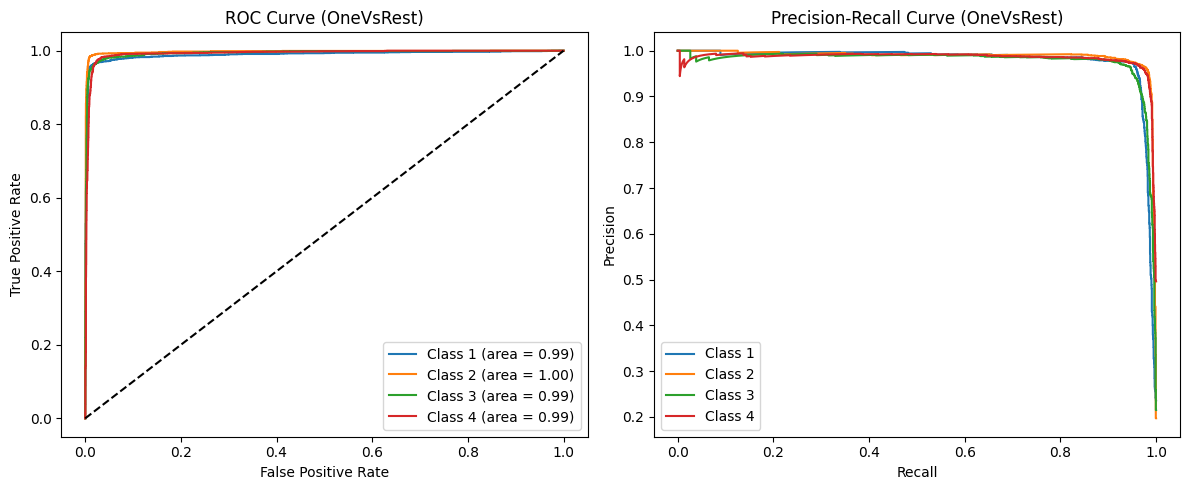

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, accuracy_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import numpy as np

# 將目標轉為二進位格式
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# 使用 OneVsRestClassifier 包裝 LogisticRegression
ovr_model = OneVsRestClassifier(LogisticRegression(max_iter=2000))
ovr_model.fit(X_train_tfidf, y_train_bin)
y_pred_bin = ovr_model.predict(X_test_tfidf)
y_score = ovr_model.decision_function(X_test_tfidf)

# 計算每個類別的準確率、macro-F1 分數
accuracies = []
f1_scores = []
for i in range(y_test_bin.shape[1]):
    acc = accuracy_score(y_test_bin[:, i], y_pred_bin[:, i])
    f1 = f1_score(y_test_bin[:, i], y_pred_bin[:, i], average='macro')
    accuracies.append(acc)
    f1_scores.append(f1)
    print(f"Class {i+1} - Accuracy: {acc:.4f}, Macro F1 Score: {f1:.4f}")

# 計算平均準確率和 F1 分數
average_accuracy = np.mean(accuracies)
average_f1 = np.mean(f1_scores)
print(f"Average Accuracy (OneVsRest): {average_accuracy:.4f}")
print(f"Average Macro F1 Score (OneVsRest): {average_f1:.4f}")

# 繪製 ROC 和 Precision-Recall 曲線
plt.figure(figsize=(12, 5))

for i in range(y_test_bin.shape[1]):
    # ROC 曲線
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"Class {i+1} (area = {roc_auc:.2f})")
    
    # Precision-Recall 曲線
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"Class {i+1}")

# ROC 曲線圖
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (OneVsRest)")
plt.legend(loc="best")

# Precision-Recall 曲線圖
plt.subplot(1, 2, 2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (OneVsRest)")
plt.legend(loc="best")

plt.tight_layout()
plt.show()
